# Customizing matplotlib figures

#### Created by: Megan Thompson-Munson

#### Last updated: 12 June 2023

Email Megan (metm9666@colorado.edu) with any questions, ideas, or comments.

## Import libraries

If you get an error, you may need to install some of these if they are not already in your environment.

In [1]:
# Numpy for generating dummy data
import numpy as np

# Matplotlib packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.mathtext import _mathtext as mathtext
import matplotlib.ticker as mticker
from matplotlib import gridspec
import matplotlib.path as mpath

# Cartopy packages
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Ignore warnings
import warnings
warnings.simplefilter('ignore', UserWarning)
warnings.filterwarnings('ignore')

## Set global parameters

These are characteristics of matplotlib figures that are applied to all figures created in this script. If you're not running your script on your local computer (i.e., if you're using a supercomputuer or Google Colab), some of these parameters may need additional lines of code to run, but the exact code differs for each platform. An example is shown below but ask Megan for help if needed.

In [2]:
# # Alpine supercomputer - uncomment if using

# import matplotlib.font_manager as font_manager # Import font manager
# font_files = font_manager.findSystemFonts(fontpaths=['/projects/metm9666/fonts']) # Directory where you've added the font file
# font_list = font_manager.createFontList(font_files) # Create font list
# font_manager.fontManager.ttflist.extend(font_list) # Add font to list of fonts
# class ArialFontConstants(mathtext.FontConstantsBase): # This moves superscript text to a better height
#     sup1 = 0.4
# mathtext._font_constant_mapping['Arial'] = ArialFontConstants

In [3]:
# Font style and size
mpl.rcParams['font.family'] = 'Arial'         # Font
mpl.rcParams['font.size'] = 10                # General font size unless set below
mpl.rcParams['axes.labelsize'] = 11           # Axes labels font size
mpl.rcParams['figure.titlesize'] = 12         # Title font size
mpl.rcParams['figure.titleweight'] = 'bold'   # Bold title
mpl.rcParams['axes.labelweight'] = 'bold'     # Bold axes labels
    
# Axes and ticks parameters
mpl.rcParams['axes.linewidth'] = 1            # Width of axes border
mpl.rcParams['xtick.direction'] = 'in'        # Make x ticks go in
mpl.rcParams['ytick.direction'] = 'in'        # Make y ticks go in
mpl.rcParams['xtick.major.size'] = 5          # Set x tick length 
mpl.rcParams['ytick.major.size'] = 5          # Set y tick length
mpl.rcParams['xtick.major.width'] = 1         # Set x tick width 
mpl.rcParams['ytick.major.width'] = 1         # Set y tick width

# Line style
mpl.rcParams['lines.linewidth'] = 1           # Set line widths on plots
mpl.rcParams['lines.linestyle'] = '-'         # Set line styles on plots

# Math text font characteristics
mpl.rcParams['mathtext.fontset'] = 'cm'       # Choose font for math text
mpl.rcParams['mathtext.default'] = 'regular'  # Make math text not bold or italic
mathtext.FontConstantsBase.sup1 = 0.4         # Move superscript text to a better height

# Figure resolution
mpl.rcParams['figure.dpi']= 300

### Figure rendering

**IMPORTANT**: Change `png` to `svg` when actually plotting. GiHub doesn't display .svg figures, which is why it's currently set to `png`. This is also treated differently locally vs on some supercomputers, so comment/uncomment the correct lines below.

In [4]:
# If on local computer:
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

# # If on Alpine:
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('png')

# For showing plots on GitHub
%matplotlib inline

## Colors

Below are a few [color palettes from Paul Tol](https://personal.sron.nl/~pault/), many of which are colorblind-friendly. These are best for discrete colors palletes, but if you need colorblind-friendly color maps, use [batlow](https://www.fabiocrameri.ch/batlow/). After you've installed batlow with the instructions from the [user guide](https://www.fabiocrameri.ch/colourmaps-userguide/), an example of using it is shown below.

There are, of course, the great color resources from matplotlib too: [colors](https://matplotlib.org/stable/gallery/color/named_colors.htmlhttps://matplotlib.org/stable/gallery/color/named_colors.html), [color maps](https://matplotlib.org/stable/tutorials/colors/colormaps.htmlhttps://matplotlib.org/stable/tutorials/colors/colormaps.html).

### Discrete colors

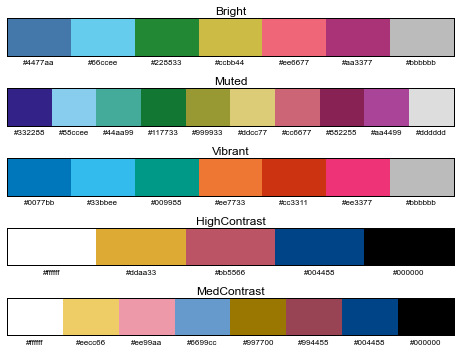

In [5]:
# Colorblind-friendly color palettes
Bright = ['#4477aa','#66ccee','#228833','#ccbb44','#ee6677','#aa3377','#bbbbbb']
Muted = ['#332288','#88ccee','#44aa99','#117733','#999933','#ddcc77','#cc6677','#882255','#aa4499','#dddddd']
Vibrant = ['#0077bb','#33bbee','#009988','#ee7733','#cc3311','#ee3377','#bbbbbb']
HighContrast = ['#ffffff','#ddaa33','#bb5566','#004488','#000000']
MedContrast = ['#ffffff','#eecc66','#ee99aa','#6699cc','#997700','#994455','#004488','#000000']

colorList = [Bright,Muted,Vibrant,HighContrast,MedContrast]
colorListStr = ['Bright','Muted','Vibrant','HighContrast','MedContrast']

# Plot colors for visualization
fig, ax = plt.subplots(len(colorList),figsize=(6.5,5))
for i in range(len(colorList)):
    
    cList = colorList[i]

    x0 = np.linspace(0,10,len(cList),endpoint=False)
    x1 = np.linspace(0,10,len(cList)+1,endpoint=True)
    xmid = (x1[1:]+x1[:-1])/2
    
    ax[i].axes.yaxis.set_ticks([])
    ax[i].axes.xaxis.set_ticks([])
    ax[i].set_ylim((0,1))
    ax[i].set_xlim((0,10))
    ax[i].set_title(colorListStr[i],pad=4)
    ax[i].tick_params(axis='x',length=0)
    ax[i].set_xticks(xmid)
    ax[i].set_xticklabels([c for c in cList],fontsize=8)
    
    for j in range(len(cList)):
        ax[i].bar(x0[j],1,color=cList[j],align='edge',width=x0[1])

plt.tight_layout()

### Color maps

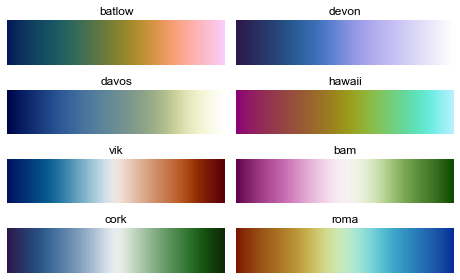

In [6]:
from cmcrameri import cm

# Create a list of example color maps to show
cmaps = [cm.batlow,cm.devon,cm.davos,cm.hawaii,cm.vik,cm.bam,cm.cork,cm.roma]
cmap_names = ['batlow','devon','davos','hawaii','vik','bam','cork','roma']

# Create dummy data for plotting
x = np.linspace(0, 100, 100)[None, :]

# Create figure for plotting
fig, axes = plt.subplots(4,2,figsize=(6.5,4))
ax = axes.flatten()

for i in range(len(cmaps)):
    ax[i].axis('off')
    ax[i].set_title(cmap_names[i])
    ax[i].imshow(x,aspect='auto',cmap=cmaps[i])
    
plt.tight_layout()

## Examples figures

### Figure customization

Below are a few examples of ways to customize figures. This is in no way a complete set of examples, but it's a starting point for customizing.

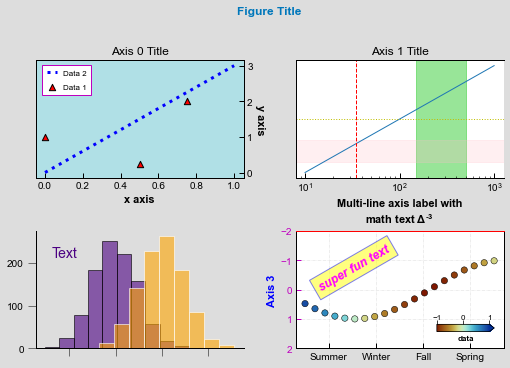

In [7]:
# Set up figure and axes
fig, axes = plt.subplots(2,2,figsize=(6.5,5))
ax = axes.flatten() # Flatten 2x2 array so that you can use ax[0],ax[1],... rather than ax[0],ax[1]...

# Figure settings
fig.patch.set_facecolor(Muted[-1]) # Figure background color
fig.suptitle('Figure Title',y=0.95,color=Vibrant[0]) # Fitle for entire figure


### Axis 0 ###

# Axis 0 settings
ax[0].patch.set_facecolor('powderblue') # Color of subplot background
ax[0].set_title('Axis 0 Title') # Title of subplot
ax[0].yaxis.tick_right() # Y tick position
ax[0].yaxis.set_label_position('right') # Y label position
ax[0].set_ylabel('y axis',rotation=270,labelpad=12) # Y label rotation and padding
ax[0].set_xlabel('x axis') # X label

# Axis 0 plotting
ax[0].scatter([0,0.5,0.75],[1,0.25,2], # x, y scatter plot
                color='r',ec='k',lw=1,marker='^',s=40, # Color, edge color, edge width, marker style, marker size
                label='Data 1') # Label for legend
ax[0].plot([0,1],[0,3], # x, y line graph
             c='b',ls=':',lw=3, # Line color, line style, line width
             label='Data 2') # Label for legend

# Axis 0 legend
legend = ax[0].legend(prop={'size':8},borderpad=0.25,labelspacing=1,handlelength=1.25,framealpha=1,
                        loc='upper left',bbox_to_anchor=(0.025,0.975))
frame = legend.get_frame() # Call frame in order to customize
frame.set_edgecolor('m') # Frame color
frame.set_boxstyle('Square') # Square frame


### Axis 1 ###

# Axis 1 settings
ax[1].set_title('Axis 1 Title') # Title of subplot
ax[1].set_xlabel('Multi-line axis label with\nmath text $\Delta^{-3}$') # X label
ax[1].axes.yaxis.set_ticks([]) # Set y ticks to nothing
ax[1].spines['right'].set_visible(False) # Set visibility of axis spine
ax[1].set_xscale('log') # Set x axis scale

# Axis 1 plotting
ax[1].plot(np.logspace(1,3,10),np.linspace(0,50,10)) # Plot an x, y line
ax[1].axvline(x=35,c='r',ls='--') # Vertical line across axis at x=35
ax[1].axhline(y=25,c='y',ls=':')  # Horizontal line across axis at y=25
ax[1].axvspan(150,500,color='limegreen',alpha=0.5,zorder=0) # Shade in a vertical region
ax[1].axhspan(5,15,color='pink',alpha=0.25,zorder=0) # Shade in a horizontal region


### Axis 2 ###

# Axis 2 settings
ax[2].patch.set_facecolor('none')
ax[2].spines['right'].set_visible(False) # Set visibility of right axis spine
ax[2].spines['top'].set_visible(False) # Set visibility of top axis spine
ax[2].tick_params(direction='out',length=8,width=0.5) # Tick direction, length, and width
ax[2].axes.xaxis.set_ticklabels([]) # Turn off x axis ticks
ax[2].text(0.2,0.75,'Text', # Text x,y position and text itself
             ha='right',va='bottom', # Alignment
             transform=ax[2].transAxes, # Transform to axis space 
             fontsize=14,color='indigo') # Font size and color

# Axis 2 plotting
ax[2].hist(np.random.normal(0,1,1000),bins=10, # Data and bins for histogram
             fc='indigo',alpha=0.6,ec='k',lw=1, # Face color, transparency, edge color, line width
             zorder=10) # Show above other layers
ax[2].hist(np.random.normal(2,1,1000),bins=10, # Data and bins for histogram
             fc='orange',alpha=0.6,ec='w',lw=1, # Face color, transparency, edge color, line width
             zorder=11) # Show above all other layers


### Axis 3 ###

# Axis 3 settings
ax[3].grid(lw=0.5,c='#dddddd',ls='-.') # Add a grid
ax[3].set_ylabel('Axis 3',c='b') # Y label text and color
ax[3].set_ylim((-2,2)) # Y limits
ax[3].tick_params(axis='y',colors='m') # Y tick colors
ax[3].set_xticks([1,2,3,4]) # X tick values
ax[3].set_xticklabels(['Summer','Winter','Fall','Spring']) # X tick labels
ax[3].spines['top'].set_color('r') # Color of top axis spine
ax[3].invert_yaxis() # Invert y axis

# Axis 3 plotting
ax[3].text(0.1,0.9,'super fun text',va='top',ha='left', # x, y, text, vertical and horizontal alignment
             transform=ax[3].transAxes,rotation=30, # Transform to axis space, rotate text
             color='fuchsia',fontweight='bold',fontstyle='italic',fontsize=12, # Font color, weight, style, size
            ).set_bbox(dict(facecolor='yellow',alpha=0.5,lw=1,ec='b',pad=5)) # Add a box
x = np.linspace(0.5,4.5,20)
y = np.sin(x)
z = np.cos(x)
scatter_plot = ax[3].scatter(x,y,c=z, # x, y, color by z values
                               cmap=cm.roma,ec='k',lw=0.5,s=40, # Color map, edge color, edge line width, size
                               vmin=-1,vmax=1,zorder=10) # Min and max shading values, rendering order

# Axis 3 colorbar
cax = inset_axes(ax[3],width=0.8,height=0.1, # Inset on axis, width, height
                 loc='lower right',bbox_to_anchor=[0.98,0.1], # Anchor corner, anchor location
                 bbox_transform=ax[3].transAxes) # Relative to axis
cbar = plt.colorbar(scatter_plot,cax=cax, # Data, axis to add it on
                    orientation='horizontal', # Orientation
                    extend='max',extendfrac=0.1) # Extend right side to a point, adjust length of extension 
cbar.set_label('data',fontsize=8) # Label and font size
cax.xaxis.set_ticks_position('top') # Location of ticks
cbar.ax.tick_params(direction='out',length=4,width=0.75,labelsize=8,pad=0) # Tick characteristics
cbar.outline.set_linewidth(0.75) # Width of outline



# Adjust subplot spacing - this is a more customizable alternative to plt.tight_layout()
plt.subplots_adjust(wspace=0.25, # Width spacing
                    hspace=0.45, # Height spacing
                    left=0, # Position of left side of subplots
                    right=1, # Position of right side of subplots
                    top=0.8, # Position of top of subplots
                    bottom=0) # Position of bottom of subplots

# # Save as .png or .pdf
# plt.savefig('testfig.png',dpi=300,bbox_inches='tight')
# plt.savefig('testfig.pdf',bbox_inches='tight')

### Map templates

In [8]:
# Get features from cartopy and set characteristics
land = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    facecolor='silver',edgecolor='gray',lw=0.75)
glacier = cfeature.NaturalEarthFeature('physical','glaciated_areas','50m',
                                       facecolor='w',edgecolor='silver',lw=0.75)
ocean = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',
                                     edgecolor='none',facecolor=cfeature.COLORS['water'])
iceshelves = cfeature.NaturalEarthFeature('physical','antarctic_ice_shelves_polys','50m',
                                          edgecolor='none',facecolor='#dddddd')
# Dummy data for plotting
lat = np.arange(70,80,0.5)
lon = np.arange(-50,-30,0.625)
lon2d,lat2d = np.meshgrid(lon,lat)
data = np.cos(np.deg2rad(lat2d)*4) + np.sin(np.deg2rad(lon2d)*4)

#### Greenland

##### One subplot

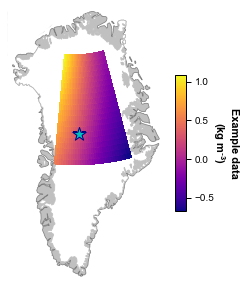

In [9]:
# Set up figure for plotting 
fig = plt.figure(figsize=(4,5)) # Figure and size
fig.patch.set_facecolor('w') # Background color

# Create axis with correct projection
ax = plt.subplot(1,1,1,projection=ccrs.NorthPolarStereo(central_longitude=-45)) # N. pole stereo plot

# Prepare map for plotting
ax.set_extent([-56.5, -30, 59, 84], ccrs.PlateCarree()) # Map extent ([lon_min,lon_max,lat_min,lat_max])
ax.add_feature(land,zorder=0) # Add the land as the first layer
ax.add_feature(glacier,zorder=1) # Add the ice sheet/glaciers as second layer
ax.axis('off') # Turn off axes
ax.fill([0,0.425,0],[0.8,1,1],c='w',zorder=2,transform=ax.transAxes) # Cover the area of Canada that shows

# Plot data
plot = ax.pcolormesh(lon,lat,data, # x, y, shading
                     transform=ccrs.PlateCarree(), # Transform to map projection
                     cmap='plasma',ec='face',zorder=3) # Colormap, edge color, layer order
ax.scatter(lon[10],lat[5], # x, y
           marker='*',s=200,color='c',ec='navy',lw=1, # Marker style, size, color, edge color, line width
           transform=ccrs.PlateCarree(), # Transform to map projection
           zorder=4) # Layer order (above pcolormesh)

# Add colorbar
cbar = plt.colorbar(plot,shrink=0.5,aspect=12) # Add colorbar to plot, shrink, aspect ratio
cbar.set_label('Example data\n(kg m$^{-3}$)',rotation=270,labelpad=25) # Colorbar label, rotation, padding
cbar.ax.tick_params(direction='out',length=5) # Tick direction, length, and width

##### Multiple subplots

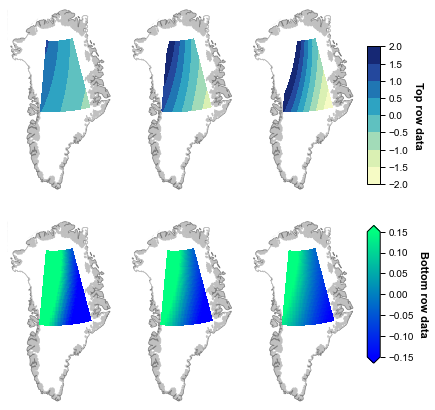

In [10]:
# Set up figure for plotting
fig, ax = plt.subplots(figsize=(6,5.5)) # Figure, axes, size
fig.patch.set_facecolor('w') # Background color
grid = gridspec.GridSpec(2,3, # Gridspec rows, columns for subpplots
                         bottom=0,top=1,left=0.1,right=0.94, # Subplot positioning
                         hspace=0.15,wspace=0.01) # Subplot spacing
grid_cbar = gridspec.GridSpec(2,1, # Gridspec rows, columns for colorbar
                              bottom=0.1,top=0.9,left=0.95,right=0.98, # Subplot positioning
                              hspace=0.3) # Subplot spacing

# Select data for plotting
data0 = [data,data*2,data*3]
data1 = [data/2,data/3,data/4]

# Loop through and plot data
for row in range(2):
    for col in range(3):
        
        # Add map subplot to grid in correct projection
        ax = plt.subplot(grid[row,col],projection=ccrs.NorthPolarStereo(central_longitude=-45))
        
        # Set up axes
        ax.set_extent([-56.5, -30, 59, 84], ccrs.PlateCarree()) # Extent
        ax.add_feature(land,zorder=0) # Add land
        ax.add_feature(glacier,zorder=1) # Add ice sheet/glaciers
        ax.axis('off') # Turn off axes
        ax.fill([0,0.425,0],[0.8,1,1],c='w',zorder=2,transform=ax.transAxes) # Cover piece of Canada
        
        # Plot top row first
        if row==0:
            
            # Plot data
            top = ax.contourf(lon,lat,data0[col], # x, y, shading
                                zorder=3,transform=ccrs.PlateCarree(), # Layer order, transform to projection
                                cmap='YlGnBu',levels=np.linspace(-2,2,9)) # Color map, contour levels
        # Plot bottom row next
        if row==1:
            
            # Plot data
            bottom = ax.pcolormesh(lon,lat,data1[col], # x, y, shading
                                   zorder=3,transform=ccrs.PlateCarree(), # Layer order, transform to projection
                                   cmap='winter',vmin=-0.15,vmax=0.15) # Color map, min value, max value

# Add colorbar for top row
cax0 = plt.subplot(grid_cbar[0]) # Create colorbar axis
cbar0 = plt.colorbar(top,cax=cax0) # Create colorbar 
cbar0.ax.tick_params(direction='out') # Tick parameters
cbar0.set_label('Top row data',rotation=270,labelpad=14) # Label, rotation, pad

# Add colorbar for bottom row
cax1 = plt.subplot(grid_cbar[1]) # Create colorbar axis
cbar1 = plt.colorbar(bottom,cax=cax1,extend='both') # Create colorbar, extend ends
cbar1.ax.tick_params(direction='out') # Tick parameters
cbar1.set_label('Bottom row data',rotation=270,labelpad=14) # Label, rotation, pad

#### Antarctica

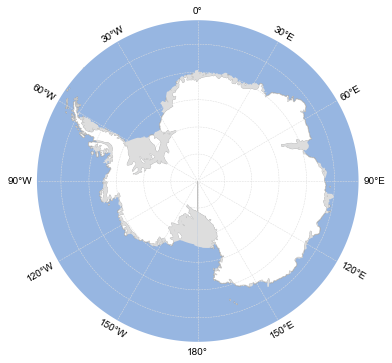

In [11]:
# Set up figure for plotting 
fig = plt.figure(figsize=(6,6))
fig.patch.set_facecolor('w')

# Create axis with correct projection and extent
ax = plt.subplot(1,1,1,projection=ccrs.SouthPolarStereo())
ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())

# Add features in correct order
ax.add_feature(ocean,zorder=0)
ax.add_feature(land,zorder=1)
ax.add_feature(glacier,zorder=2)
ax.add_feature(iceshelves,zorder=3)

# Calculate a circular boundary
circle_path = mpath.Path.unit_circle()
circle_path = mpath.Path(circle_path.vertices.copy()*ax.get_ylim()[1],circle_path.codes.copy())

# Set boundary and remove frame
ax.set_boundary(circle_path) # Set boundary to circle
ax.set_frame_on(False) # Hide the boundary frame

# # Add lat/lon gridlines with labels for both
# ax.gridlines(crs=ccrs.PlateCarree(),zorder=4, # Transform to projection, layer order
#              linewidth=0.5,color='#dddddd',linestyle='--', # Line width, color, style
#              xlocs=range(-180,180,30),ylocs=range(-90,-60,5), # x, y label range
#              draw_labels=True) # Draw labels

# Add longitude gridlines with labels
ax.gridlines(crs=ccrs.PlateCarree(),zorder=4, # Transform to projection, layer order
             linewidth=0.5,color='#dddddd',linestyle='--', # Line width, color, style
             xlocs=range(-180,180,30),ylocs=range(0), # x, y label range
             draw_labels=True) # Draw labels

# Add gridlines latitude gridlines without labels
ax.gridlines(crs=ccrs.PlateCarree(),zorder=4, # Transform to projection, layer order
             linewidth=0.5,color='#dddddd',linestyle='--', # Line width, color, style
             xlocs=range(0),ylocs=range(-90,-60,5), # x, y label range
             draw_labels=False) # Do not draw labels

#### Arctic

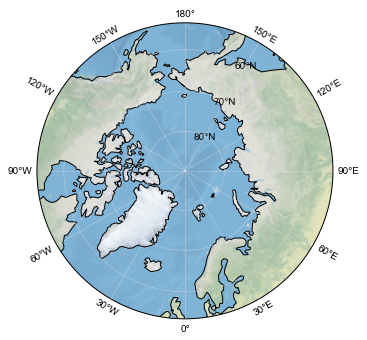

In [12]:
# Set up figure for plotting 
fig = plt.figure(figsize=(6,6))
fig.patch.set_facecolor('w')

# Create axis with correct projection and extent
ax = plt.subplot(1,1,1,projection=ccrs.NorthPolarStereo())
ax.set_extent([-180, 180, 50, 90], ccrs.PlateCarree())

# Add stock image and coastlines
ax.stock_img()
ax.coastlines(zorder=3)

# Calculate a circular boundary
circle_path = mpath.Path.unit_circle()
circle_path = mpath.Path(circle_path.vertices.copy()*ax.get_ylim()[1]*0.9, # Need to adjust the limit slightly
                         circle_path.codes.copy())

# Set boundary and remove frame
ax.set_boundary(circle_path) # Set boundary to circle

# Add lat/lon gridlines with labels for both
ax.gridlines(crs=ccrs.PlateCarree(),zorder=4, # Transform to projection, layer order
             linewidth=0.5,color='#dddddd',linestyle='--', # Line width, color, style
             xlocs=range(-180,180,30),ylocs=range(50,90,10), # x, y label range
             draw_labels=True) # Draw labels

# # Add longitude gridlines with labels
# ax.gridlines(crs=ccrs.PlateCarree(),zorder=4, # Transform to projection, layer order
#              linewidth=0.5,color='#dddddd',linestyle='--', # Line width, color, style
#              xlocs=range(-180,180,30),ylocs=range(0), # x, y label range
#              draw_labels=True) # Draw labels

# # Add gridlines latitude gridlines without labels
# ax.gridlines(crs=ccrs.PlateCarree(),zorder=4, # Transform to projection, layer order
#              linewidth=0.5,color='#dddddd',linestyle='--', # Line width, color, style
#              xlocs=range(0),ylocs=range(50,90,10), # x, y label range
#              draw_labels=False) # Do not draw labels